# **Working with Excel Spread sheets**

## **Excel Documents**

An Excel spreadsheet document is called a workbook. 

A single workbook is saved in a file with the .xlsx extension.

Each workbook can contain multiple sheets

The currently viewing sheet (or last viewed before closing Excel) is called the active sheet.

Each sheet has columns and rows, a box particular to row and column is cell

## **Installing the openpyxl Module**

  
  $>pip install openpyxL

  import openpyxl

##  **Reading Excel Documents**

Create Excel file example.xlsx and the following data

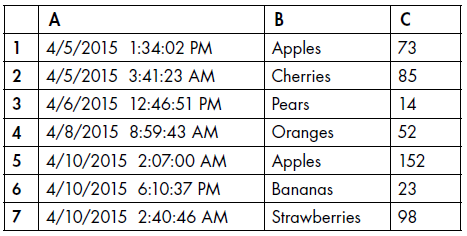

## **Opening Excel Documents with OpenPyXL**

The openpyxl.load_workbook() function takes in the filename and returns a value of the workbook data type. This Workbook object represents the Excel file

In [ ]:
import openpyxl
wb = openpyxl.load_workbook('example.xlsx')
type(wb)

## **Getting Sheets from the Workbook**

You can get a list of all the sheet names in the workbook by calling the get_sheet_names() method.

In [ ]:
import openpyxl
wb = openpyxl.load_workbook('example.xlsx')
  #print(wb.get_sheet_names())#Deprecated function
print(wb.sheetnames)

  #sheet = wb.get_sheet_by_name('Sheet3')#Deprecated function
sheet = wb['Sheet3']
print(sheet)

print(type(sheet))

print(sheet.title)

  #anotherSheet = wb.get_active_sheet() #Deprecated function
anotherSheet = wb.active
print(anotherSheet)


### **Getting Cells from the Sheets**

Once we have a Worksheet object, we can access a Cell object by its name. The Cell object has a value attribute that contains, unsurprisingly, the value stored in that cell. Cell objects also have row, column, and coordinate attributes that provide location information for the cell.

In [ ]:
import openpyxl
wb = openpyxl.load_workbook('example.xlsx')
sheet = wb['Sheet1']
print(sheet['A1'])

print(sheet['A1'].value)

c = sheet['B1']
print(c.value)

print('Row ' + str(c.row) + ', Column ' + str(c.column) + ' is ' + c.value)

print('Cell ' + c.coordinate + ' is ' + c.value)

print(sheet['C1'].value)


The value attribute of our Cell object for cell B1 gives us the string 'Apples'. 

The row attribute gives us the integer 1, the column attribute gives us 'B', and the coordinate attribute gives us 'B1'.

Apart from alphabet for column identification, these can be identified by numbers starting from 1.

In [ ]:
sheet.cell(row=1, column=2)
<Cell Sheet1.B1>

sheet.cell(row=1, column=2).value
'Apples'

for i in range(1, 8, 2):
  print(i, sheet.cell(row=i, column=2).value)

We can determine the size of the sheet with the Worksheet object’s `get_highest_row()` and `get_highest_column()` methods. These two methods are deprecated, instead, we use `max_row` and `max_column` attributed

In [ ]:
import openpyxl
wb = openpyxl.load_workbook('example.xlsx')
sheet = wb.get_sheet_by_name('Sheet1')
#sheet.get_highest_row() # Deprecated
sheet.max_row
#sheet.get_highest_column() #Deprecated
sheet.max_column

### **Converting Between Column Letters and Numbers**

openpyxl.cell.column_index_from_string() - convert from letters to numbers

openpyxl.cell.get_column_letter() - convert from numbers to letters

The function get_column_letter has been relocated in Openpyxl version 2.4 from openpyxl.cell to openpyxl.utils.

In [ ]:
import openpyxl
from openpyxl.cell import get_column_letter, column_index_from_string
get_column_letter(1)
'A'

get_column_letter(2)
'B'

get_column_letter(27)
'AA'

get_column_letter(900)
'AHP'

wb = openpyxl.load_workbook('example.xlsx')
sheet = wb['Sheet1']
get_column_letter(sheet.max_column)
'C'

column_index_from_string('A')
1

column_index_from_string('AA')
27

### **Getting Rows and Columns from the Sheets**

You can slice Worksheet objects to get all the Cell objects in a row, column, or rectangular area of the spreadsheet.

In [ ]:
import openpyxl
wb = openpyxl.load_workbook('example.xlsx')
sheet = wb['Sheet1']
tuple(sheet['A1':'C3'])

In [ ]:
for rowOfCellObjects in sheet['A1':'C3']:
  for cellObj in rowOfCellObjects:
    print(cellObj.coordinate, cellObj.value)
  print('--- END OF ROW ---')

To access the values of cells in a particular row or column, you can also use a Worksheet object’s rows and columns attribute

In [ ]:
import openpyxl
wb = openpyxl.load_workbook('example.xlsx')
sheet = wb.get_active_sheet()
sheet.columns[1]

In [ ]:
for cellObj in sheet.columns[1]:
  print(cellObj.value)

## **Project: Reading Data from a Spreadsheet**

`This is what your program does:`

• Reads the data from the Excel spreadsheet.

• Counts the number of census tracts in each county.

• Counts the total population of each county.

• Prints the results.


`This means your code will need to do the following:`

• Open and read the cells of an Excel document with the openpyxl module.

• Calculate all the tract and population data and store it in a data structure.

• Write the data structure to a text file with the .py extension using the
pprint module.

In [ ]:
import openpyxl, pprint
print('Opening workbook...')
wb = openpyxl.load_workbook('censuspopdata.xlsx')
sheet = wb['Population by Census Tract']
countyData = {}
# Fill in countyData with each county's population and tracts.
print('Reading rows...')
for row in range(2, sheet.max_row + 1):
    # Each row in the spreadsheet has data for one census tract.
    state  = sheet['B' + str(row)].value
    county = sheet['C' + str(row)].value
    pop    = sheet['D' + str(row)].value

    # Make sure the key for this state exists.
    countyData.setdefault(state, {})
    # Make sure the key for this county in this state exists.
    countyData[state].setdefault(county, {'tracts': 0, 'pop': 0})

    # Each row represents one census tract, so increment by one.
    countyData[state][county]['tracts'] += 1
    # Increase the county pop by the pop in this census tract.
    countyData[state][county]['pop'] += int(pop)

# Open a new text file and write the contents of countyData to it.
print('Writing results...')
resultFile = open('census2010.py', 'w')
resultFile.write('allData = ' + pprint.pformat(countyData))
resultFile.close()
print('Done.')

## **Ideas for Similar Programs**

• Compare data across multiple rows in a spreadsheet.

• Open multiple Excel files and compare data between spreadsheets.

• Check whether a spreadsheet has blank rows or invalid data in any cells and alert the user if it does.

• Read data from a spreadsheet and use it as the input for your Python programs.

# **Writing Excel Documents**

OpenPyXL support creating and editing spreadsheet files

### **Creating and Saving Excel Documents**

Call the openpyxl.Workbook() function to create a new, blank Workbook object

In [ ]:
import openpyxl
wb = openpyxl.Workbook()
wb.get_sheet_names()
['Sheet']
sheet = wb.get_active_sheet()
sheet.title

'Sheet'

sheet.title = 'Spam Bacon Eggs Sheet'
wb.get_sheet_names()

['Spam Bacon Eggs Sheet']

In [ ]:
The workbook will start off with a single sheet named Sheet. You can change the name of the sheet by storing a new string in its title attribute.

save() function call saves the content of the spread sheet

In [ ]:
import openpyxl
wb = openpyxl.load_workbook('example.xlsx')
sheet = wb.get_active_sheet()
sheet.title = 'Spam Spam Spam'
wb.save('example_copy.xlsx')

### **Creating and Removing Sheets**

Sheets can be added to and removed from a workbook with the create_sheet() and remove_sheet() methods.

In [ ]:
import openpyxl
wb = openpyxl.Workbook()
print(wb.sheetnames)

['Sheet']

wb.create_sheet()

<Worksheet "Sheet1">



['Sheet', 'Sheet1']

wb.create_sheet(index=0, title='First Sheet')

<Worksheet "First Sheet">

print(wb.sheetnames)

['First Sheet', 'Sheet', 'Sheet1']

wb.create_sheet(index=2, title='Middle Sheet')
<Worksheet "Middle Sheet">

print(wb.sheetnames)
['First Sheet', 'Sheet', 'Middle Sheet', 'Sheet1']

The `remove_sheet()` method takes a Worksheet object, not a string of the sheet name, as its argument. 


In [ ]:
print(wb.sheetnames())
['First Sheet', 'Sheet', 'Middle Sheet', 'Sheet1']

wb.remove_sheet(wb.get_sheet_by_name('Middle Sheet'))
wb.remove_sheet(wb.get_sheet_by_name('Sheet1'))
print(wb.sheetnames)
['First Sheet', 'Sheet']

### **Writing Values to Cells**


In [ ]:
import openpyxl
wb = openpyxl.Workbook()
sheet = wb['Sheet']
sheet['A1'] = 'Hello world!'
print(sheet['A1'].value)

Hello world!


## **Project: Updating a Spreadsheet**

In this project, we’ll write a program to update cells in a spreadsheet of produce sales. Your program will look through the spreadsheet, find specific kinds of produce, and update their prices.

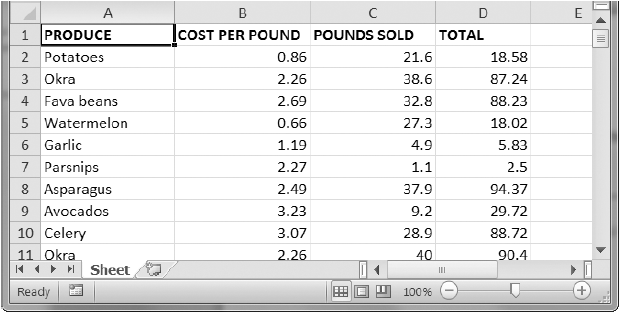

Your program does the following:

• Loops over all the rows.

• If the row is for garlic, celery, or lemons, changes the price.

This means your code will need to do the following:

• Open the spreadsheet file.

• For each row, check whether the value in column A is Celery, Garlic, or Lemon.

• If it is, update the price in column B.

• Save the spreadsheet to a new file (so that you don’t lose the old spreadsheet, just in case).

## **Ideas for Similar Programs**

• Read data from one spreadsheet and write it to parts of other spreadsheets.

• Read data from websites, text files, or the clipboard and write it to a spreadsheet.

• Automatically “clean up” data in spreadsheets. For example, it could use regular expressions to read multiple formats of phone numbers and edit them to a single, standard format.

## **Setting the Font Style of Cells**

To customize font styles in cells, important, import the Font() and Style() functions from the openpyxl.styles module.

In [ ]:
from openpyxl.styles import Font, Style

Example: creates a new workbook and sets cell A1 to have a 24-point, italicized font.

In [ ]:
import openpyxl
from openpyxl.styles import Font, Style
wb = openpyxl.Workbook()
sheet = wb['Sheet']
italic24Font = Font(size=24, italic=True)
styleObj = Style(font=italic24Font)
sheet['A1'].style = styleObj
sheet['A1'] = 'Hello world!'
wb.save('styled.xlsx')

## **Font Objects**

To set font style attributes, you pass keyword arguments to Font()

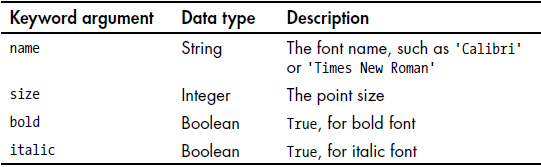

### **Formulas**

Formulas, which begin with an equal sign, can configure cells to contain values calculated from other cells.

Use of openpyxl module enables programmatically add formulas to cells, just like any normal value.

In [ ]:
sheet['B9'] = '=SUM(B1:B8)'

This will store =SUM(B1:B8) as the value in cell B9. This sets the B9 cell to a formula that calculates the sum of values in cells B1 to B8.

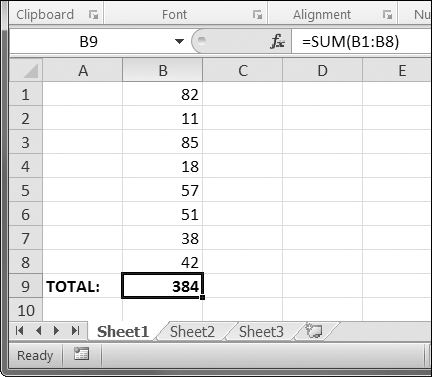

A formula is set just like any other text value in a cell.



In [ ]:
import openpyxl
wb = openpyxl.Workbook()
sheet = wb.get_active_sheet()
sheet['A1'] = 200
sheet['A3'] = '=SUM(A1:A2)'
wb.save('writeFormula.xlsx')

Formula entered can be accessed as only as calculated value by including `data_only=true` in workbook loading


In [ ]:
wbDataOnly = openpyxl.load_workbook('writeFormula.xlsx', data_only=True)
sheet = wbDataOnly.active
print(sheet['A3'].value)

## **Adjusting Rows and Columns**

### **Setting Row Height and Column Width**

Worksheet objects have row_dimensions and column_dimensions attributes that control row heights and column widths.

In [ ]:
import openpyxl
wb = openpyxl.Workbook()
sheet = wb.get_active_sheet()
sheet['A1'] = 'Tall row'
sheet['B2'] = 'Wide column'
sheet.row_dimensions[1].height = 70
sheet.column_dimensions['B'].width = 20
wb.save('dimensions.xlsx')

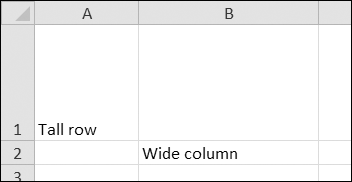

Once you have the RowDimension object, you can set its height. Once you have the ColumnDimension object, you can set its width. 

The row height can be set to an integer or float value between 0 and 409. This value represents the height measured in points, where one point equals 1/72 of an inch. The default row height is 12.75. 

The column width can be set to an integer or float value between 0 and 255. This value represents the number of characters at the default font size (11 point) that can be displayed in the cell. The default column width is 8.43 characters. 

Columns with widths of 0 or rows with heights of 0 are hidden from the user.

### **Merging and Unmerging Cells**

A rectangular area of cells can be merged into a single cell with the merge_cells() sheet method

In [ ]:
import openpyxl
wb = openpyxl.Workbook()
sheet = wb.active
sheet.merge_cells('A1:D3')
sheet['A1'] = 'Twelve cells merged together.'
sheet.merge_cells('C5:D5')
sheet['C5'] = 'Two merged cells.'
wb.save('merged.xlsx')

The argument to merge_cells() is a single string of the top-left and bottom-
right cells of the rectangular area to be merged: 'A1:D3' merges 12 cells into a single cell. 

To set the value of these merged cells, simply set the value of the top-left cell of the merged group.

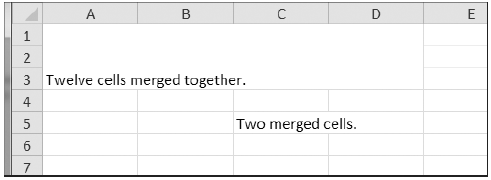

To unmerge cells, call the unmerge_cells() sheet method

In [ ]:
import openpyxl
wb = openpyxl.load_workbook('merged.xlsx')
sheet = wb.get_active_sheet()
sheet.unmerge_cells('A1:D3')
sheet.unmerge_cells('C5:D5')
wb.save('merged.xlsx')

### **Freeze Panes**

For spreadsheets too large to be displayed all at once, it’s helpful to “freeze” a few of the top rows or leftmost columns onscreen. Frozen column or row headers, for example, are always visible to the user even as they scroll through the spreadsheet. These are known as freeze panes. 

In OpenPyXL, each Worksheet object has a freeze_panes attribute that can be set to a Cell object or a string of a cell’s coordinates.

To unfreeze all panes, set freeze_panes to None or 'A1'

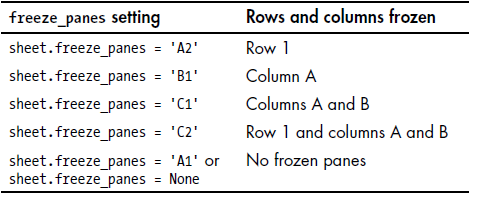

In [ ]:
import openpyxl
wb = openpyxl.load_workbook('produceSales.xlsx')
sheet = wb.active
sheet.freeze_panes = 'A2'
wb.save('freezeExample.xlsx')

## **Charts**

OpenPyXL supports creating bar, line, scatter, and pie charts using the data in a sheet’s cells. 

To make a chart, you need to do the following:

1. Create a Reference object from a rectangular selection of cells.
2. Create a Series object by passing in the Reference object.
3. Create a Chart object.
4. Append the Series object to the Chart object.
5. Optionally, set the drawing.top, drawing.left, drawing.width, and drawing.height variables of the Chart object.
6. Add the Chart object to the Worksheet object.

The Reference object requires some explaining. Reference objects are created
by calling the openpyxl.charts.Reference() function and passing three arguments:

1. The Worksheet object containing your chart data.
2. A tuple of two integers, representing the top-left cell of the rectangular selection of cells containing your chart data: The first integer in the tuple is the row, and the second is the column. Note that 1 is the first row, not 0.
3. A tuple of two integers, representing the bottom-right cell of the rectangular selection of cells containing your chart data: The first integer in
the tuple is the row, and the second is the column.

shows some sample coordinate arguments

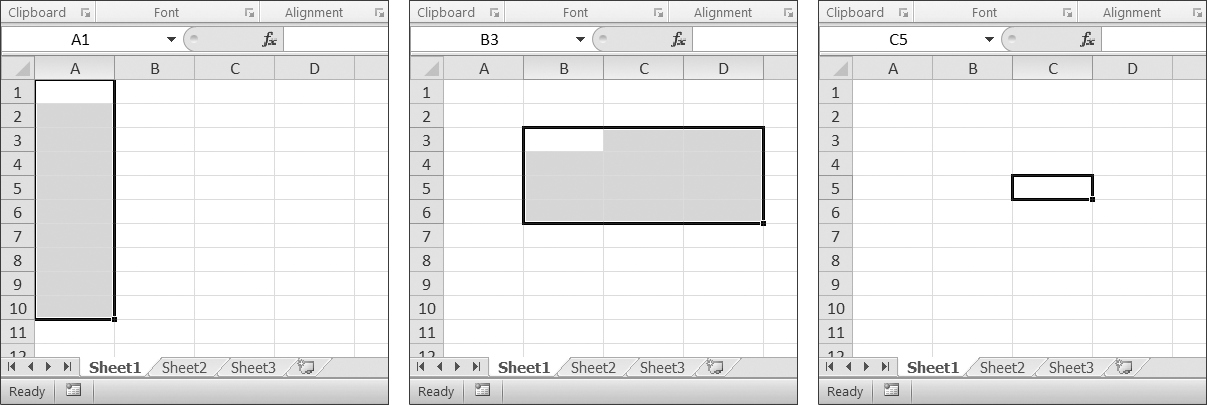

From left to right: (1, 1), (10, 1); (3, 2), (6, 4); (5, 3), (5, 3)

In [ ]:
import openpyxl
wb = openpyxl.Workbook()
sheet = wb.get_active_sheet()
for i in range(1, 11): # create some data in column A
  sheet['A' + str(i)] = i
refObj = openpyxl.charts.Reference(sheet, (1, 1), (10, 1))
seriesObj = openpyxl.charts.Series(refObj, title='First series')
chartObj = openpyxl.charts.BarChart()
chartObj.append(seriesObj)
chartObj.drawing.top = 50 # set the position
chartObj.drawing.left = 100
chartObj.drawing.width = 300 # set the size
chartObj.drawing.height = 200
sheet.add_chart(chartObj)
wb.save('sampleChart.xlsx')

The sampleChart.xlsx will contain the following:

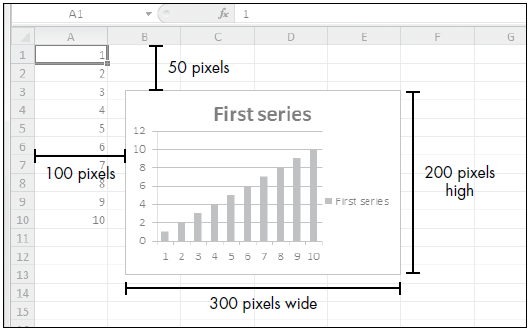

We’ve created a bar chart by calling openpyxl.charts.BarChart(). We can also create line charts, scatter charts, and pie charts by calling openpyxl.charts.LineChart(), openpyxl.charts.ScatterChart(), and openpyxl.charts.PieChart().